In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import pickle

import helper
import seaborn as sns

In [2]:
df_orig = helper.get_data()

In [3]:
df_orig.shape

(18110, 20)

### 25 clusters

In [4]:
# 21 (18 clusters), 28 (22 clusters), 41 (25 clusters) - dataset1 (without 01)
df = helper.get_cluster_df(df_orig, idx = 41, expected_cluster = 25)

/home/nandy/repository/bit/agp/helper.py:110: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_fossil = df_fossil.groupby(['clust'])['fossil','green'].sum().sort_values('fossil', ascending = False)


### Avg energy shares

In [5]:
helper.print_energy_shares(df)

### Cluster distribution

In [6]:
helper.plot_cluster_percentages(df)

### Cluster distribution by state

In [7]:
t = helper.get_cluster_state_shares(df)
print(t)

state    NSW1    QLD1     SA1    TAS1    VIC1
clust                                        
1         0.0  1928.0     0.0     0.0     0.0
2         0.0   380.0     0.0     0.0     0.0
3         0.0     0.0     0.0     0.0  2056.0
4         1.0  1253.0     0.0     0.0     0.0
5         0.0    57.0     0.0     0.0     0.0
6        73.0     0.0     0.0     0.0     0.0
7      2118.0     2.0     0.0     0.0     0.0
8         0.0     0.0     0.0     0.0   475.0
9         0.0     0.0     0.0     0.0   366.0
10     1330.0     2.0     0.0     0.0     0.0
11      100.0     0.0     0.0     0.0     0.0
12        0.0     0.0     0.0     0.0   439.0
13        0.0     0.0     0.0     0.0   286.0
14        0.0     0.0     1.0     0.0     0.0
15        0.0     0.0   323.0     0.0     0.0
16        0.0     0.0  1785.0     0.0     0.0
17        0.0     0.0   101.0     0.0     0.0
18        0.0     0.0    16.0     0.0     0.0
19        0.0     0.0   238.0     0.0     0.0
20        0.0     0.0   620.0     

### Cluster plot by state and individual days

unique clusters [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


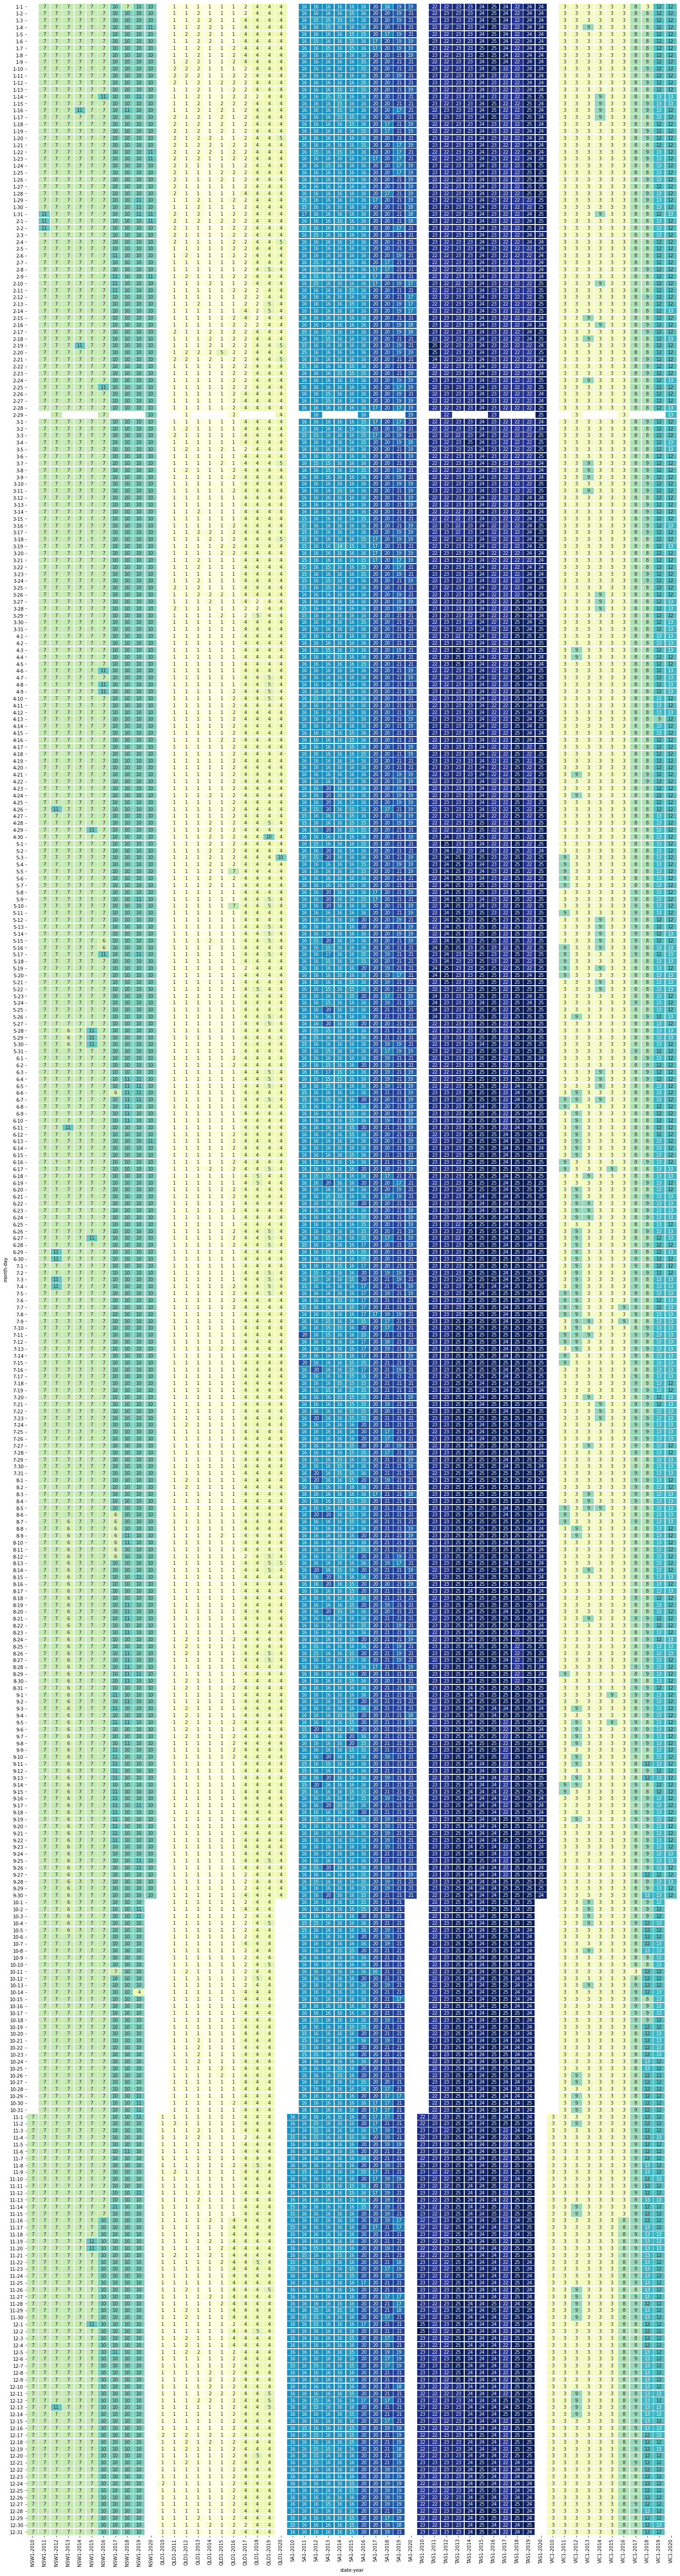

In [8]:
helper.print_state_year_month_matrix(df, use_day = True)

### Cluster plot by state and months

In [ ]:
def print_state_year_month_matrix(X, use_day = False, plot_size = 12, save = False, fname=''):
    if use_day:
        X = X[['state', 'year', 'month', 'day', 'clust', 'probs']]
        X = get_cluster_assignment_day(X)
    else:
        X = X[['datetime', 'state', 'year', 'month', 'clust', 'probs']]
        X = get_cluster_assignment_month(X)
    
    X.loc[:, 'clust'] = X['clust'].astype('int')
    print('unique clusters {}'.format(np.sort(X['clust'].unique())))

    # reshape for plotting    
    if use_day:
        X = X.pivot_table(index = ['month', "day"], columns =['state', 'year'], values = "clust")
        fig, ax = plt.subplots(figsize=(25, 100))
    else:
        X = X.pivot_table(index = ['state', 'month'], columns = "year", values = "clust")
        fig, ax = plt.subplots(figsize=(plot_size, plot_size))  
    
    svm = sns.heatmap(X,annot=True, linewidths=.5, cmap="YlGnBu", ax = ax, cbar = False)
    sns_plot = svm.get_figure()    
    if save:
        sns_plot.savefig('results/plots/{}_heatmap_daily.png'.format(fname), dpi=400)

unique clusters [ 1  2  3  4  6  7  8  9 10 11 12 13 16 17 19 20 21 22 23 24 25]


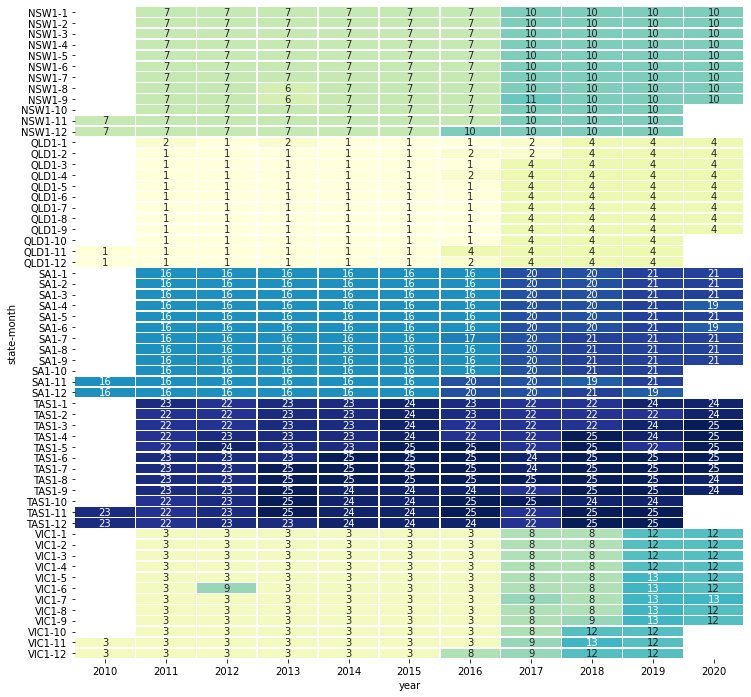

In [9]:
helper.print_state_year_month_matrix(df, use_day = False)

### Demand

Text(0, 0.5, 'Demand')

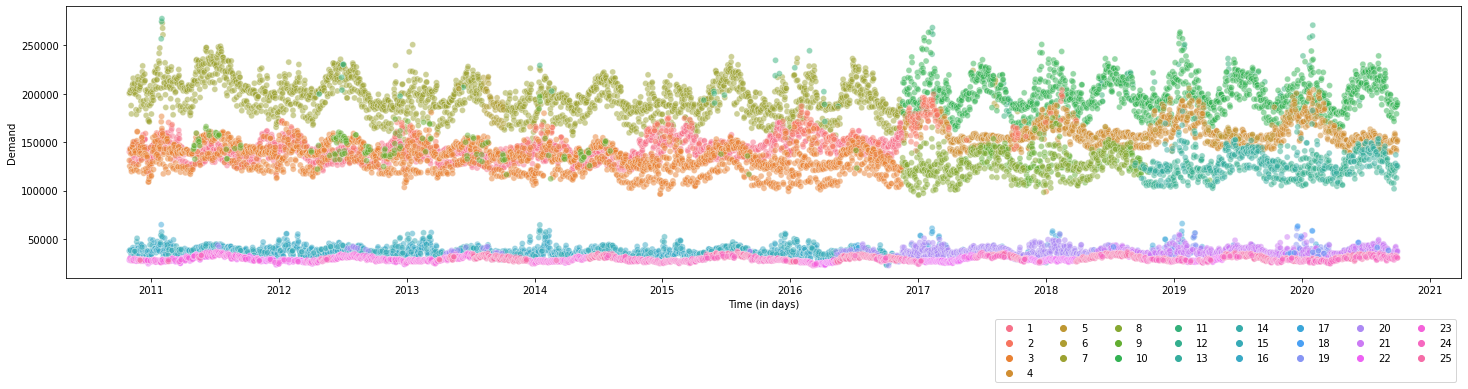

In [15]:
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'demand', hue='clust_category', data = df, alpha = 0.5)
g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in days)')
# Set y-axis label
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

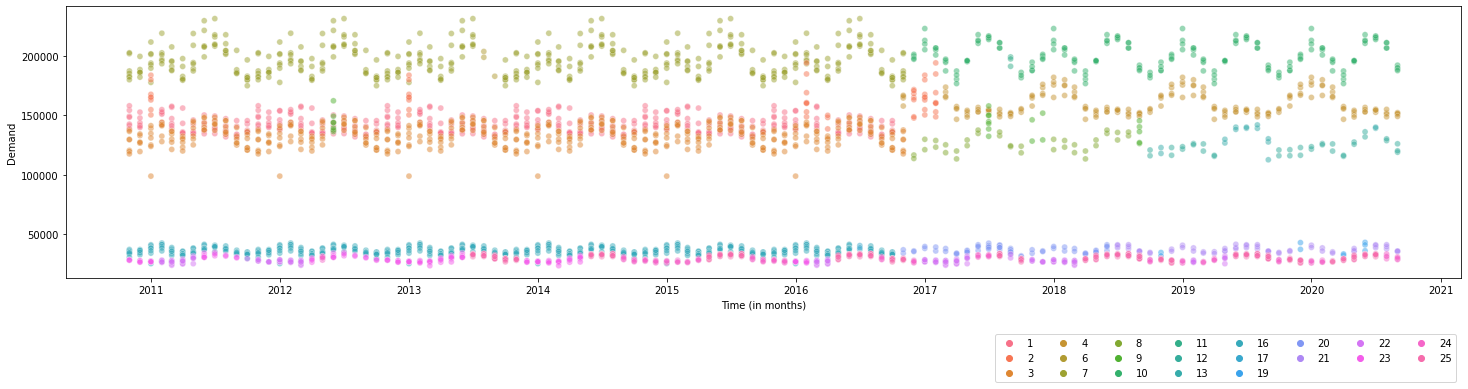

In [16]:
t = helper.get_additional_col_month(df, 'demand')
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'demand', hue='clust_category', data = t, alpha = 0.5)
g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in months)')
# Set y-axis label
plt.ylabel('Demand')

### RRP

Text(0, 0.5, 'RRP')

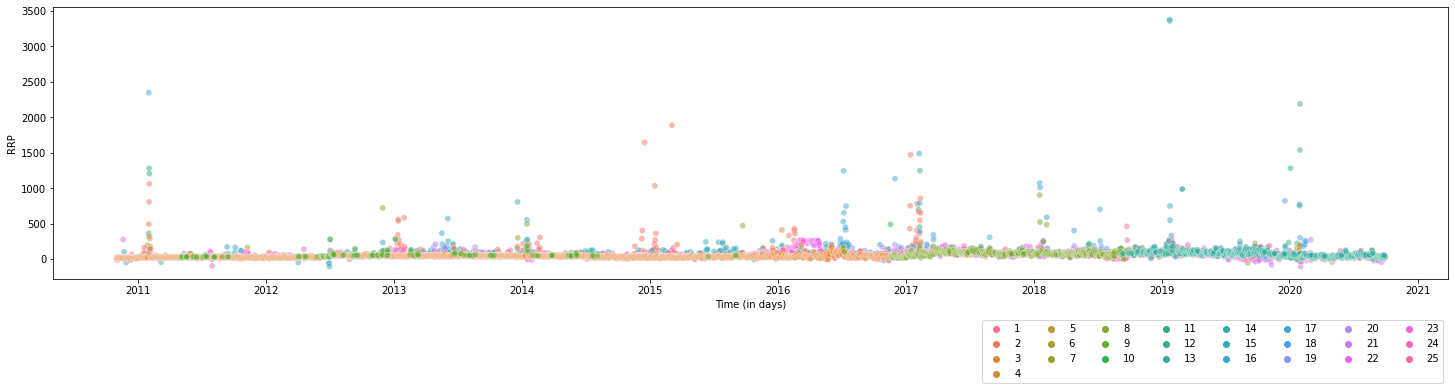

In [20]:
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'rrp', hue='clust_category', data = df, alpha = 0.5)
g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in days)')
# Set y-axis label
plt.ylabel('RRP')

Text(0, 0.5, 'RRP')

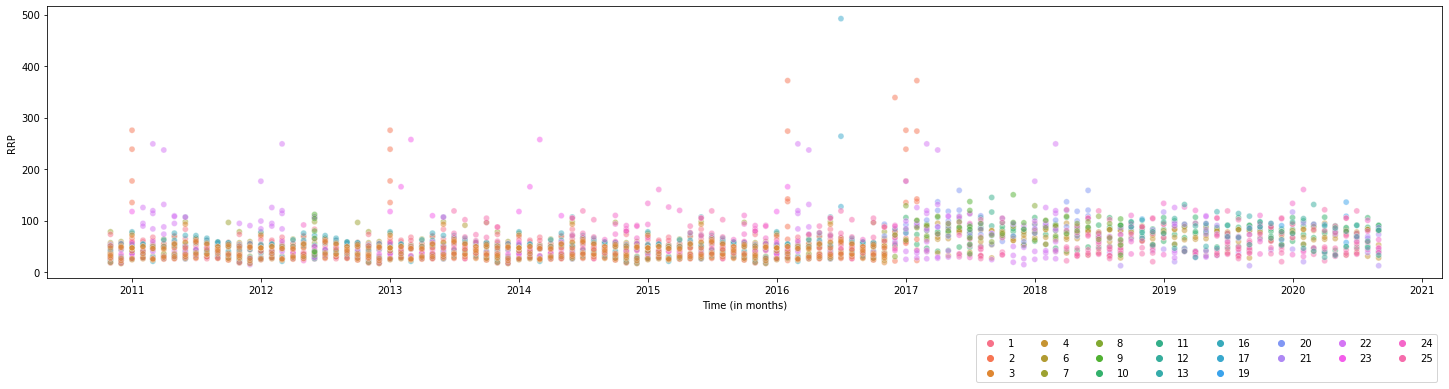

In [21]:
t = helper.get_additional_col_month(df, 'rrp')
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'rrp', hue='clust_category', data = t, alpha = 0.5)
g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in months)')
# Set y-axis label
plt.ylabel('RRP')

### Export

Text(0, 0.5, 'Export')

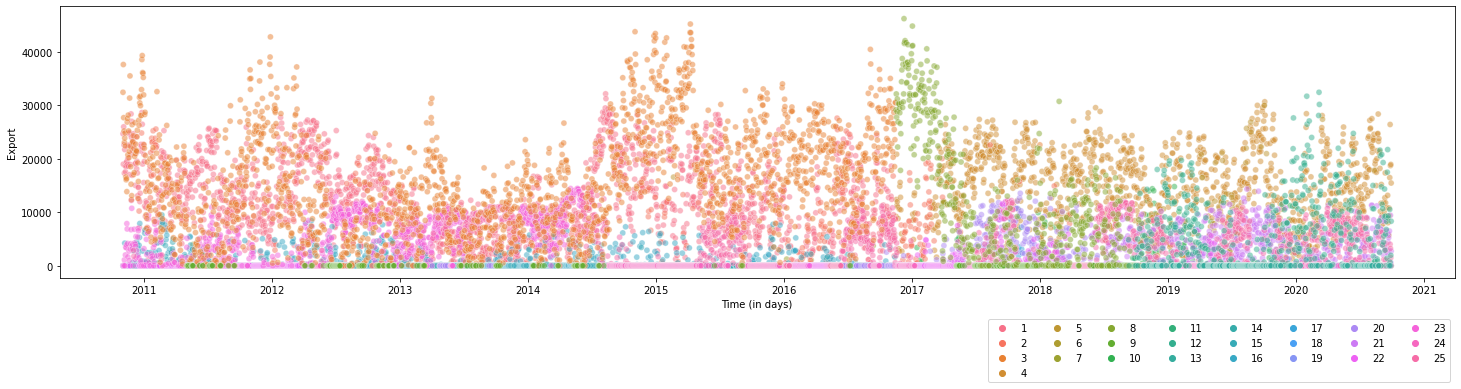

In [22]:
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'export', hue='clust_category', data = df, alpha = 0.5)

g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in days)')
# Set y-axis label
plt.ylabel('Export')

Text(0, 0.5, 'Export')

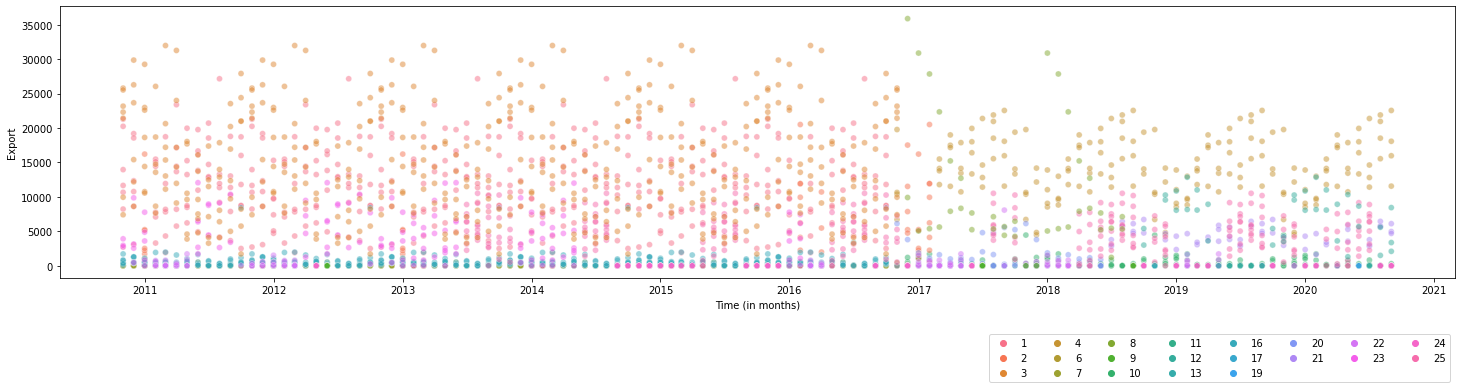

In [23]:
t = helper.get_additional_col_month(df, 'export')
fig, ax = plt.subplots(figsize=(25, 5))
g = sns.scatterplot(x = 'datetime', y = 'export', hue='clust_category', data = t, alpha = 0.5)

g.legend(loc=4, ncol= 8, bbox_to_anchor=(1, -0.4))
# Set x-axis label
plt.xlabel('Time (in months)')
# Set y-axis label
plt.ylabel('Export')

### 2 dimensional view

Text(0, 0.5, 'Dimension 2')

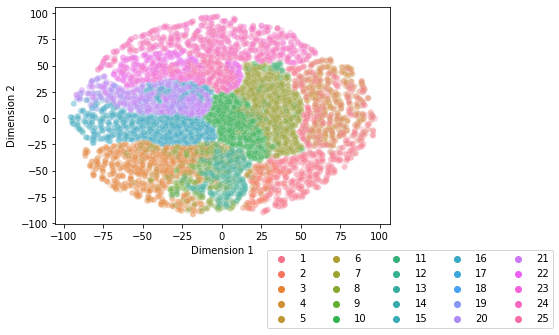

In [29]:
Z = pd.DataFrame(pickle.load(open('models/ftz_daily_5.pkl', 'rb')))
Z = Z.rename(columns={0: "dim1", 1: "dim2"})
Z['state'] = df['state'].astype('str').astype('category')
Z['clust_category'] = df['clust_category']

g = sns.scatterplot(x="dim1", y="dim2", hue="clust_category", data=Z, edgecolors='none', alpha = 0.1)
# sns.despine(bottom=True)
g.legend(loc=4, ncol= 5, bbox_to_anchor=(1.5, -0.5))
# Set x-axis label
plt.xlabel('Dimension 1')
# Set y-axis label
plt.ylabel('Dimension 2')

In [42]:
X_sub

state   datetime  bagasse  batterys  blackcoal  browncoal    diesel  \
0     NSW1 2010-11-01      0.0       0.0  63.947452        0.0  0.000000   
1     NSW1 2010-11-02      0.0       0.0  69.289126        0.0  0.000000   
2     NSW1 2010-11-03      0.0       0.0  69.088809        0.0  0.000000   
3     NSW1 2010-11-04      0.0       0.0  68.617745        0.0  0.000000   
4     NSW1 2010-11-05      0.0       0.0  69.005714        0.0  0.000000   
...    ...        ...      ...       ...        ...        ...       ...   
3619  NSW1 2020-09-27      0.0       0.0  67.242164        0.0 -0.000089   
3620  NSW1 2020-09-28      0.0       0.0  70.273321        0.0 -0.000100   
3621  NSW1 2020-09-29      0.0       0.0  68.814292        0.0 -0.000115   
3622  NSW1 2020-09-30      0.0       0.0  67.994348        0.0 -0.000178   
3625  NSW1 2019-10-14      0.0       0.0  74.596530        0.0  0.000427   

            gas     hydro  kerosene  ...  net_import  export  month  day  \
0      7.772444  9.762840       0.0  ...   17.867292     0.0     11    1   
1      7.226918  3.376892       0.0  ...   19.751030     0.0     11    2   
2      7.314797  2.188212       0.0  ...   20.852212     0.0     11    3   
3      7.649918  3.384328       0.0  ...   19.138920     0.0     11    4   
4      6.664182  4.018449       0.0  ...   19.182176     0.0     11    5   
...         ...       ...       ...  ...         ...     ...    ...  ...   
3619   2.123450  2.020183       0.0  ...   10.734007     0.0      9   27   
3620   1.754504  3.806245       0.0  ...    7.152154     0.0      9   28   
3621   1.275208  3.494389       0.0  ...    9.188158     0.0      9   29   
3622   0.989496  6.715959       0.0  ...   10.361389     0.0      9   30   
3625  10.317106  4.085175       0.0  ...    0.125969     0.0     10   14   

         probs  clust  fossil  green  clust_old  clust_category  
0     0.999982      7   84.08   5.18         43               7  
1     0.999993      7   84.08   5.18         43               7  
2     0.999997      7   84.08   5.18         43               7  
3     0.999994      7   84.08   5.18         43               7  
4     0.999990      7   84.08   5.18         43               7  
...        ...    ...     ...    ...        ...             ...  
3619  1.000000     10   80.24  13.24          6              10  
3620  1.000000     10   80.24  13.24          6              10  
3621  1.000000     10   80.24  13.24          6              10  
3622  0.999997     10   80.24  13.24          6              10  
3625  0.990769      4   89.81  10.17         21               4  

[3622 rows x 26 columns]

In [ ]:
import random
import warnings
warnings.filterwarnings('ignore')


SMALL_SIZE = 100
MEDIUM_SIZE = 120

energy_cols = ['wind', 'solar', 'solar_rooftop', 'blackcoal', 'browncoal','gas','diesel','kerosene','hydro','bagasse','batterys', 'net_import']
additional_cols = ['export', 'demand']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE, markerscale = 10)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# sample 15K points
Xplot = pd.DataFrame()
for s in df.state.unique():
    X_sub = df[df.state == s]
    max_sample = 5000 if X_sub.shape[0] > 5000 else X_sub.shape[0]
    X_sub = X_sub.iloc[random.sample(range(0, X_sub.shape[0]), max_sample),:]
    Xplot = pd.concat([Xplot, X_sub])
    
pp = sns.pairplot(Xplot[energy_cols + additional_cols + ['clust_category']], hue = 'clust_category', diag_kind = 'kde',
             plot_kws = {'alpha': 0.5, 'edgecolor': 'k'}, height = 10)
plt.show()